### [참조. intel GPU 활용]

In [ ]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt
%matplotlib inline

# intel gpu 적용
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import keras
# mnist 데이터셋 
from keras.datasets import mnist

### [ 참조. CUDA GPU 활용]

In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

import os
os.environ["CUDA_VISIBLE_DEVICES"]='1'

# cuda gpu 적용
from tensorflow import keras
# mnist 데이터셋 
from tensorflow.keras.datasets import mnist

### 1. 모델 생성

##### 1. 데이터 불러오기

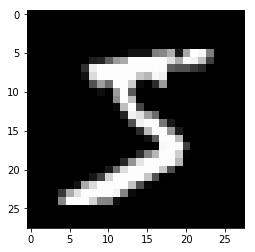

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0], cmap="gray")

##### 2. 데이터 정제

In [3]:
from tensorflow.keras.utils import to_categorical

IMG_SIZE = 28

# 합성곱 신경망 depth 추가
x_train = x_train.reshape(len(x_train),IMG_SIZE,IMG_SIZE,1)
x_test = x_test.reshape(len(x_test),IMG_SIZE,IMG_SIZE,1)

# 원핫인코딩 적용
y_train_one = to_categorical(y_train)
y_test_one = to_categorical(y_test)

##### 3. 모델 생성

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
import numpy as np

modelDim = x_train[0].shape
nclass = x_train

nclasses = len(np.unique(y_train))

In [5]:
model = keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation="relu", input_shape=modelDim))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation="relu"))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=nclasses, activation="softmax"))

model.summary()

INFO:plaidml:Opening device "opencl_intel_hd_graphics_620.0"


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
__________

In [6]:
# model_json = model.to_json()

# with open ("model_mnist.json","w") as json_file:
#     json_file.write(model_json)

In [7]:
from tensorflow.keras.utils import plot_model

In [8]:
# plot_model(model, show_shapes=True)

##### 모델 컴파일 및 훈련

In [9]:
# import tensorflow as tf

In [10]:
model.compile(loss= "categorical_crossentropy",
         optimizer="adam",
             metrics=["accuracy"])

model.fit(x_train, y_train_one, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10


INFO:plaidml:Analyzing Ops: 81 of 211 operations complete


48000/48000 [==============================] - 50s 1ms/step - loss: 1.9017 - acc: 0.7137 - val_loss: 0.1808 - val_acc: 0.9519
Epoch 2/10
48000/48000 [==============================] - 39s 821us/step - loss: 0.3499 - acc: 0.8883 - val_loss: 0.1235 - val_acc: 0.9665
Epoch 3/10
48000/48000 [==============================] - 40s 828us/step - loss: 0.2754 - acc: 0.9128 - val_loss: 0.1016 - val_acc: 0.9708
Epoch 4/10
48000/48000 [==============================] - 39s 820us/step - loss: 0.2441 - acc: 0.9234 - val_loss: 0.0874 - val_acc: 0.9752
Epoch 5/10
48000/48000 [==============================] - 40s 824us/step - loss: 0.2147 - acc: 0.9319 - val_loss: 0.0878 - val_acc: 0.9743
Epoch 6/10
48000/48000 [==============================] - 40s 832us/step - loss: 0.2031 - acc: 0.9370 - val_loss: 0.0806 - val_acc: 0.9773
Epoch 7/10
48000/48000 [==============================] - 40s 823us/step - loss: 0.1962 - acc: 0.9398 - val_loss: 0.0744 - val_acc: 0.9762
Epoch 8/10
48000/48000 [================

In [13]:
model.evaluate(x_test, y_test_one)

10000/10000 [==============================] - 7s 690us/step


[0.06331238393485546, 0.9813]

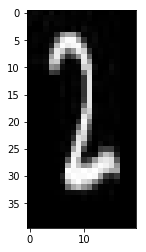

In [4]:
import cv2

testimg = cv2.imread("../images/mnist/trainingSet/2_two/img_10247.jpg", cv2.IMREAD_GRAYSCALE)

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(testimg, cmap="gray")

In [21]:
refinedImg  = testimg.reshape(1,28,28,1)

answer = np.argmax(model.predict(refinedImg))

In [22]:
import pyttsx3
engine = pyttsx3.init()

engine.say(str(answer))
engine.runAndWait()

In [43]:
model_json = model.to_json()

with open ("model_mnist2.json","w") as json_file:
    json_file.write(model_json)

In [44]:
import json
from tensorflow.keras.models import model_from_json

with open('model_mnist2.json', 'r') as json_file:
    loaded_model = model_from_json(json_file.read())

loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

In [45]:
model.save_weights("model_mnist.h5")